In [15]:
import subprocess
import glob as glob
import pandas as pd

In [44]:
# number of sdgs to consider
n_sdg = 17
sdg_strings = [''.join(('sdg',str(ii))) for ii in range(1,n_sdg+1)]

In [45]:
# create gams files to run each sdg
with open('sdg_dea.gms', 'rt') as fin:
    
    # loop over sdgs
    for s in sdg_strings:
        
        # open new file for this sdg
        fout_path = r'run_files\{}.gms'.format(s)
        with open(fout_path, 'wt') as fout:
            
            # replace sdg0 with sdgN in each line
            for line in fin:
                fout.write(line.replace('sdg0', s))
                
        # run it        
        subprocess.run(['gams', fout_path, 'o=Nul'])
        
        # need to reset pointer in fin to beginning of file to repeat
        fin.seek(0)
        print(s,'completed')

sdg1 completed
sdg2 completed
sdg3 completed
sdg4 completed
sdg5 completed
sdg6 completed
sdg7 completed
sdg8 completed
sdg9 completed
sdg10 completed
sdg11 completed
sdg12 completed
sdg13 completed
sdg14 completed
sdg15 completed
sdg16 completed
sdg17 completed


In [3]:
import glob as glob
import pandas as pd

# number of sdgs to consider
n_sdg = 17
sdg_strings = [''.join(('sdg',str(ii))) for ii in range(1,n_sdg+1)]

In [4]:
# read and concat efficiency results
path = r'output_files' # path to files
eff_files = sorted(glob.glob(path + "/*eff_res.csv")) # efficiency result files
eff_df = pd.concat((pd.read_csv(f, sep='\t', index_col=0) for f in eff_files), axis=1) # read and concat
eff_df = eff_df[sdg_strings] # put them in order

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig, axes = plt.subplots(1,2, figsize=(10,20))

norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=norm)

sns.heatmap(eff_df.iloc[0:int(eff_df.shape[0]/2),:], cmap='Greens', cbar=False, ax=axes[0])
sns.heatmap(eff_df.iloc[int(eff_df.shape[0]/2)::,:], cmap='Greens', cbar=False, ax=axes[1])

plt.draw()
p0 = axes[0].get_position().get_points().flatten()
p1 = axes[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[3]+0.03, p1[2]-p0[0], 0.02])
plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
plt.savefig('eff_heatmap.jpg', dpi=600)
plt.title('Efficiency',fontsize=24)
plt.show()

<Figure size 1000x2000 with 3 Axes>

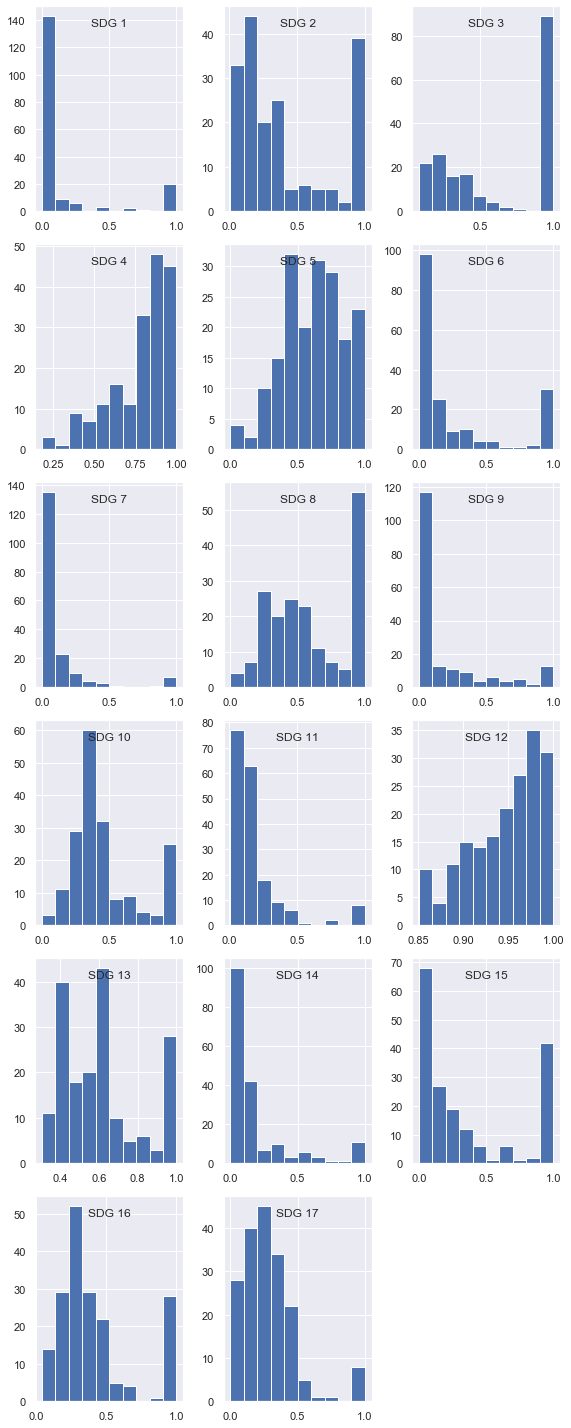

In [20]:
eff_df = pd.read_csv('eff_out.csv', index_col=0)

fig = plt.figure(figsize=(8,20))

for ii,c in enumerate(eff_df.columns):
    ax = fig.add_subplot(6,3,ii+1)
    ax.hist(eff_df[c])
#     ax.set_ylim(0,150)
#     ax.set_xlim(0,1)
    ax.set_title(' '.join(('SDG',str(ii+1))), pad=-20)

# for ax in fig.get_axes():
#     ax.label_outer()

fig.tight_layout()
plt.savefig('eff_hist.jpg', dpi=600)
plt.show()

In [14]:
eff_df

,sdg1,sdg2,sdg3,sdg4,sdg5,sdg6,sdg7,sdg8,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17
AFG,0.119327,0.788016,1.000000,1.0,1.0,0.012231,1.000000,0.236925,1.0,0.056958,0.124808,0.693754,-1.285340,0.068649,1.000000,1.000000,0.075878
AGO,0.004024,0.921463,1.000000,1.0,1.0,0.139534,0.554458,0.455688,1.0,0.131243,0.226576,0.547289,0.067636,0.780870,0.109905,1.000000,1.000000
ALB,0.027555,0.464146,1.000000,1.0,1.0,0.148800,1.000000,0.493760,1.0,0.195253,0.184193,0.259251,0.074776,0.112903,0.055291,0.540989,0.001142
ARE,0.026550,1.000000,1.000000,1.0,1.0,0.022519,0.522831,1.000000,1.0,0.468255,0.150238,-18.642630,-0.188834,0.176991,0.004927,0.293156,1.000000
ARG,0.033200,1.000000,1.000000,1.0,1.0,1.000000,0.582272,0.912745,1.0,0.566900,0.250615,0.124296,-0.801544,0.035329,0.027259,1.000000,0.077037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.020555,0.629117,1.000000,1.0,1.0,0.069919,0.560626,0.445108,1.0,0.226429,0.357546,-9.248270,1.000000,0.079895,0.017906,1.000000,0.000405
YEM,0.006421,0.606724,1.000000,1.0,1.0,0.006547,1.000000,0.594381,1.0,-0.474474,0.143447,-4.404050,0.238362,1.000000,1.000000,0.673250,0.000392
ZAF,0.001833,0.670667,0.412587,1.0,1.0,0.111836,0.404742,0.493323,1.0,-1.716950,0.123483,0.221029,0.031303,0.090883,0.042005,1.000000,0.043287
ZMB,1.000000,0.699371,1.000000,1.0,1.0,0.738974,1.000000,0.522641,1.0,-0.397839,0.688957,1.000000,1.000000,0.068649,0.305140,1.000000,0.007653
